# Author: Ryan Cowan
- Date: May 16th 2019
- Data Scientist Interview

#standard open source data science libraries from anaconda
import numpy
import numpy as np
import pandas
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import pickle

In [2]:
#Set some pandas display options
pandas.set_option("precision", 1)
pandas.set_option("display.max_rows",1000)
pandas.set_option("display.max_columns",1000)
pandas.options.display.float_format = '{:.2f}'.format

#configure matplotlib plot size
fig_size = matplotlib.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12

### Download the data

In [3]:
# Had to set encoding manually because default 'utf-8' had an unrecognized character
data = pandas.read_csv('http://aws-proserve-data-science.s3.amazonaws.com/device_failure.csv ', encoding="ISO-8859-1")

In [4]:
data.info(verbose=True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
date          124494 non-null object
device        124494 non-null object
failure       124494 non-null int64
attribute1    124494 non-null int64
attribute2    124494 non-null int64
attribute3    124494 non-null int64
attribute4    124494 non-null int64
attribute5    124494 non-null int64
attribute6    124494 non-null int64
attribute7    124494 non-null int64
attribute8    124494 non-null int64
attribute9    124494 non-null int64
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [5]:
# converting date column to datetime type makes it easier to work with
data['date'] = data['date'].astype('datetime64')

### Feature values and distributions- Are there missing data, wacky values, etc?

In [6]:
data.describe(include='all', percentiles = [.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494,124494,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00
unique,304,1169,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,2015-01-03 00:00:00,W1F0SJJ2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,1163,304,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
first,2015-01-01 00:00:00,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
last,2015-11-02 00:00:00,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,NaN,0.00,122388103.24,159.48,9.94,1.74,14.22,260172.66,0.29,0.29,12.45
std,NaN,NaN,0.03,70459334.22,2179.66,185.75,22.91,15.94,99151.08,7.44,7.44,191.43
min,NaN,NaN,0.00,0.00,0.00,0.00,0.00,1.00,8.00,0.00,0.00,0.00
1%,NaN,NaN,0.00,2401025.28,0.00,0.00,0.00,4.00,26.00,0.00,0.00,0.00


Most of the attributes are not normally distributed. 

In [7]:
#keep the list of features for future use
features = data.columns[3:]
print(features)

Index(['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5',
       'attribute6', 'attribute7', 'attribute8', 'attribute9'],
      dtype='object')


### How are the features values distributed over time?

In [8]:
# replace each attribute value with the decile number of it's respective distribution
data_norm = data.copy()
#the apply function is notoriously slow. if the data were larger, would need a better way to decile the attributes
data_norm[features] = data[features].apply(lambda x: pandas.qcut(x, 10, False, duplicates = "drop"), axis=1)
data_norm.head()


,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,7,5,0,4,1,6,0,0,2
1,2015-01-01,S1F0166B,0,4,0,1,0,2,3,0,0,0
2,2015-01-01,S1F01E6Y,0,3,0,0,0,1,2,0,0,0
3,2015-01-01,S1F01JE0,0,3,0,0,0,1,2,0,0,0
4,2015-01-01,S1F01R2B,0,4,0,0,0,2,3,0,0,1


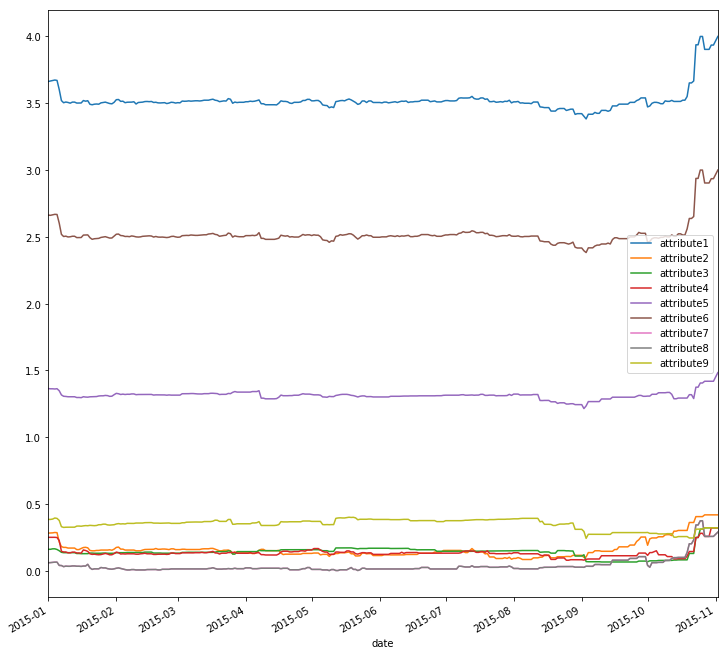

In [10]:
date_groups = data_norm.groupby('date')
att_means = date_groups[features].agg(numpy.mean)
att_means.plot()

### Note: 
Because of data skewness (non-normal distribution), a lot of the variables could not be deciled into 10 perfect bins. Thus, when I calculated the daily decile average for each of these features, some of them have overall bin averages far below the expected 5. However, the point of the above graph is to see if the values tend to shift over time

### How many total devices had failed at each date?

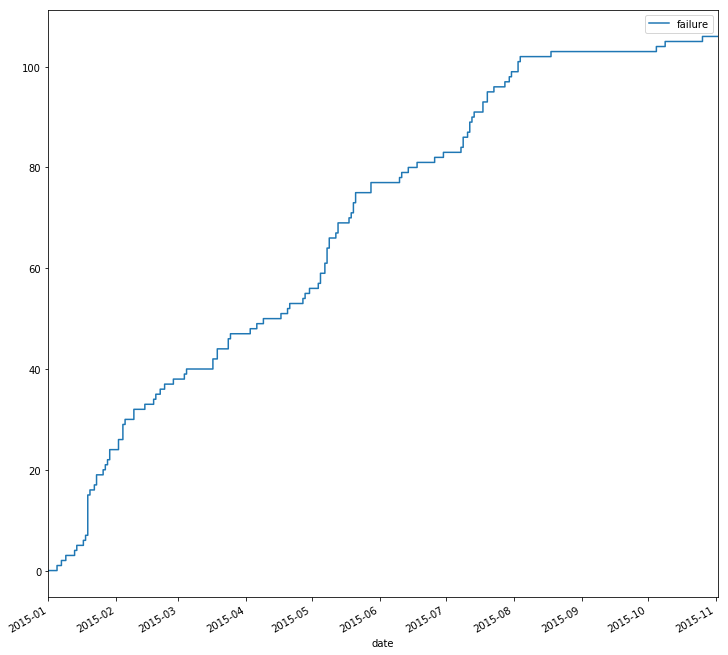

In [11]:
failure_cumsum = data.loc[:,['date','failure']].set_index('date')
failure_cumsum['failure'] = failure_cumsum['failure'].agg(numpy.cumsum)
failure_cumsum.plot()

### How many devices were reporting each day?

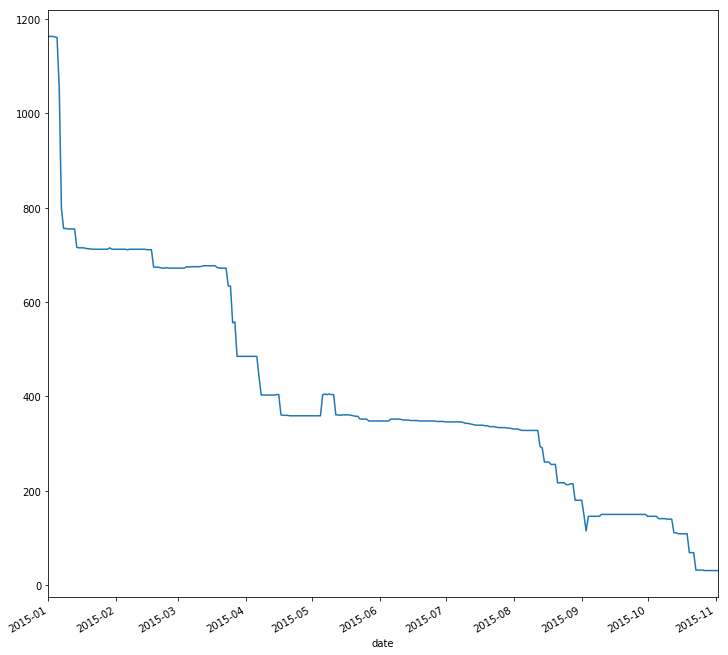

In [12]:
date_groups = data_norm.groupby('date')
date_counts = date_groups['device'].count()
date_counts.plot()

### Device Analysis

In [13]:
len(data['device'].unique())

1169

In [14]:
# see if each device only fails once
print(len(data[data['failure'] == 1]['device'].unique()))
print(len(data[data['failure'] == 1]['device']))

106
106


In [15]:
# does any device after a failure?
i = 0
for device in data[data['failure'] == 1]['device'].values:
    i += 1
    if i < 10: print(data.loc[data['device'] == device,['date','device','failure']])

           date    device  failure
235  2015-01-01  S1F0RRB1        0
1398 2015-01-02  S1F0RRB1        0
2561 2015-01-03  S1F0RRB1        0
3724 2015-01-04  S1F0RRB1        0
4885 2015-01-05  S1F0RRB1        1
           date    device  failure
63   2015-01-01  S1F0CTDN        0
1226 2015-01-02  S1F0CTDN        0
2389 2015-01-03  S1F0CTDN        0
3552 2015-01-04  S1F0CTDN        0
4713 2015-01-05  S1F0CTDN        0
5856 2015-01-06  S1F0CTDN        0
6879 2015-01-07  S1F0CTDN        1
           date    device  failure
648  2015-01-01  W1F0PNA5        0
1811 2015-01-02  W1F0PNA5        0
2974 2015-01-03  W1F0PNA5        0
4137 2015-01-04  W1F0PNA5        0
5298 2015-01-05  W1F0PNA5        0
6404 2015-01-06  W1F0PNA5        0
7303 2015-01-07  W1F0PNA5        0
8067 2015-01-08  W1F0PNA5        0
8823 2015-01-09  W1F0PNA5        1
            date    device  failure
824   2015-01-01  W1F13SRV        0
1987  2015-01-02  W1F13SRV        0
3150  2015-01-03  W1F13SRV        0
4312  2015-01-04

### Create new features

In [17]:
# these nested loops are also bad design if the data were larger or if we were implementing this model in production
# however in production you would probably be getting the data from a SQL database so would have other options than Pandas
for days_back in [1,3,9]:
    for f in features:
        new_feat_name = f+"_change_"+str(days_back)
        #data[new_feat_name] = data[f].pct_change(5).head(50))

        data.loc[:,new_feat_name] = numpy.nan
        i = 0
        for d in data['device'].unique():
            i += 1
            data.loc[(data['device'] == d),new_feat_name] = data.loc[(data['device'] == d),f].pct_change(days_back).fillna(0)

In [18]:
# inf occur when the variable changes from zero to non zero
# the model will split values so we can replace infs with any sufficiently large number
data = data.replace(np.inf, 100000)
# na values occur when compared values are both 0, which is the same as no change
# so we can replace those with 0
data = data.fillna(0)

In [20]:
# check to see if our new variables works as intended
f = 'attribute2'
newf = f+'_change_9'
i = 0
for device in data[data['failure'] == 1]['device'].values:
    i += 1
    if (i < 30) & (i > 20): print(data[data['device'] == device][['date','device',f,newf]].head(1000))
        
        

            date    device  attribute2  attribute2_change_9
530   2015-01-01  W1F03DP4           0                 0.00
1693  2015-01-02  W1F03DP4           0                 0.00
2856  2015-01-03  W1F03DP4           0                 0.00
4019  2015-01-04  W1F03DP4           0                 0.00
5180  2015-01-05  W1F03DP4           0                 0.00
6296  2015-01-06  W1F03DP4           0                 0.00
16802 2015-01-20  W1F03DP4           0                 0.00
17514 2015-01-21  W1F03DP4           0                 0.00
18226 2015-01-22  W1F03DP4           0                 0.00
18938 2015-01-23  W1F03DP4           0                 0.00
19651 2015-01-24  W1F03DP4           0                 0.00
20363 2015-01-25  W1F03DP4           0                 0.00
21075 2015-01-26  W1F03DP4           0                 0.00
21786 2015-01-27  W1F03DP4           0                 0.00
            date    device  attribute2  attribute2_change_9
561   2015-01-01  W1F0FW0S           0  

In [24]:
# update feature list
features = []
for x in data.columns:
    if x[:3] == 'att':
        features.append(x)
    
print(features)

['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8', 'attribute9', 'attribute1_change_1', 'attribute2_change_1', 'attribute3_change_1', 'attribute4_change_1', 'attribute5_change_1', 'attribute6_change_1', 'attribute7_change_1', 'attribute8_change_1', 'attribute9_change_1', 'attribute1_change_3', 'attribute2_change_3', 'attribute3_change_3', 'attribute4_change_3', 'attribute5_change_3', 'attribute6_change_3', 'attribute7_change_3', 'attribute8_change_3', 'attribute9_change_3', 'attribute1_change_9', 'attribute2_change_9', 'attribute3_change_9', 'attribute4_change_9', 'attribute5_change_9', 'attribute6_change_9', 'attribute7_change_9', 'attribute8_change_9', 'attribute9_change_9']


In [27]:
data[features].describe(include='all', percentiles = [.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,attribute1_change_1,attribute2_change_1,attribute3_change_1,attribute4_change_1,attribute5_change_1,attribute6_change_1,attribute7_change_1,attribute8_change_1,attribute9_change_1,attribute1_change_3,attribute2_change_3,attribute3_change_3,attribute4_change_3,attribute5_change_3,attribute6_change_3,attribute7_change_3,attribute8_change_3,attribute9_change_3,attribute1_change_9,attribute2_change_9,attribute3_change_9,attribute4_change_9,attribute5_change_9,attribute6_change_9,attribute7_change_9,attribute8_change_9,attribute9_change_9
count,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00
mean,122388103.24,159.48,9.94,1.74,14.22,260172.66,0.29,0.29,12.45,12.44,40.17,6.43,51.41,0.00,0.00,45.79,45.79,25.70,13.17,116.48,18.48,138.16,0.00,0.01,122.90,122.90,74.70,13.95,296.43,42.57,323.72,0.00,0.03,277.93,277.93,195.19
std,70459334.22,2179.66,185.75,22.91,15.94,99151.08,7.44,7.44,191.43,923.46,2003.67,801.60,2266.76,0.01,0.07,2139.27,2139.27,1603.05,920.17,3410.82,1359.10,3714.42,0.02,0.38,3503.53,3503.53,2732.16,899.98,5436.21,2062.88,5680.36,0.03,2.02,5264.55,5264.55,4413.74
min,0.00,0.00,0.00,0.00,1.00,8.00,0.00,0.00,0.00,-1.00,-0.89,0.00,0.00,-0.14,0.00,-1.00,-1.00,0.00,-1.00,-0.81,0.00,0.00,-0.14,0.00,-1.00,-1.00,0.00,-1.00,-0.76,0.00,0.00,-0.14,0.00,-1.00,-1.00,0.00
1%,2401025.28,0.00,0.00,0.00,4.00,26.00,0.00,0.00,0.00,-0.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10%,24285120.00,0.00,0.00,0.00,6.00,192870.00,0.00,0.00,0.00,-0.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
20%,48945064.00,0.00,0.00,0.00,7.00,216305.40,0.00,0.00,0.00,-0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
30%,73918430.40,0.00,0.00,0.00,8.00,227110.90,0.00,0.00,0.00,-0.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
40%,98281940.80,0.00,0.00,0.00,9.00,241068.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,122797388.00,0.00,0.00,0.00,10.00,249799.50,0.00,0.00,0.00,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Create new target variable

In [28]:
data.loc[:,'fail_7d'] = 0

i = 0
for d in data['device'].unique():
    i += 1
    df = data[data['device'] == d][['date','failure']]
    fail_date = df[df['failure'] == 1]['date'].values
    if len(fail_date) > 0:
        fail_date = fail_date[0]
        maint_date = fail_date - pd.Timedelta('7 days')
        data.loc[(data['device'] == d)&(data['date'] >= maint_date),'fail_7d'] = 1


In [29]:
# check to see if our new variable works as intended
i = 0
data.head()
for device in data[data['failure'] == 1]['device'].values:
    i += 1
    if (i < 30) & (i > 20): print(data[data['device'] == device][['date','device','failure','fail_7d']])

            date    device  failure  fail_7d
530   2015-01-01  W1F03DP4        0        0
1693  2015-01-02  W1F03DP4        0        0
2856  2015-01-03  W1F03DP4        0        0
4019  2015-01-04  W1F03DP4        0        0
5180  2015-01-05  W1F03DP4        0        0
6296  2015-01-06  W1F03DP4        0        0
16802 2015-01-20  W1F03DP4        0        1
17514 2015-01-21  W1F03DP4        0        1
18226 2015-01-22  W1F03DP4        0        1
18938 2015-01-23  W1F03DP4        0        1
19651 2015-01-24  W1F03DP4        0        1
20363 2015-01-25  W1F03DP4        0        1
21075 2015-01-26  W1F03DP4        0        1
21786 2015-01-27  W1F03DP4        1        1
            date    device  failure  fail_7d
561   2015-01-01  W1F0FW0S        0        0
1724  2015-01-02  W1F0FW0S        0        0
2887  2015-01-03  W1F0FW0S        0        0
4050  2015-01-04  W1F0FW0S        0        0
5211  2015-01-05  W1F0FW0S        0        0
6325  2015-01-06  W1F0FW0S        0        0
7247  2015

In [52]:
data.to_csv("./data/device_failure.csv")


### Separate In sample and out sample data sets by date

In [ ]:
# out of sample validation
outofsample = data.loc[data['date'] >= '2015-08-01']
insample = data.loc[data['date'] < '2015-08-01']


### Separate in sample data into test and training sets

In [31]:
#insample['train'] = numpy.random.rand(len(insample)) < .75

i = 0
for d in data['device'].unique():
    i += 1
    data.loc[data['device'] == d,'train'] = (numpy.random.rand() < .75)
    if (i > 10) & (i < 20): print(data.loc[data['device'] == d,['date','device','train']])
data.head(20)

           date    device train
10   2015-01-01  S1F02EVN  True
1173 2015-01-02  S1F02EVN  True
2336 2015-01-03  S1F02EVN  True
3499 2015-01-04  S1F02EVN  True
4661 2015-01-05  S1F02EVN  True
5822 2015-01-06  S1F02EVN  True
            date    device train
11    2015-01-01  S1F02L38  True
1174  2015-01-02  S1F02L38  True
2337  2015-01-03  S1F02L38  True
3500  2015-01-04  S1F02L38  True
4662  2015-01-05  S1F02L38  True
5823  2015-01-06  S1F02L38  True
6869  2015-01-07  S1F02L38  True
7667  2015-01-08  S1F02L38  True
8423  2015-01-09  S1F02L38  True
9179  2015-01-10  S1F02L38  True
9934  2015-01-11  S1F02L38  True
10689 2015-01-12  S1F02L38  True
11444 2015-01-13  S1F02L38  True
12199 2015-01-14  S1F02L38  True
12915 2015-01-15  S1F02L38  True
13630 2015-01-16  S1F02L38  True
14345 2015-01-17  S1F02L38  True
15060 2015-01-18  S1F02L38  True
15774 2015-01-19  S1F02L38  True
16488 2015-01-20  S1F02L38  True
17201 2015-01-21  S1F02L38  True
17913 2015-01-22  S1F02L38  True
18625 2015-01-23 

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,attribute1_change_1,attribute2_change_1,attribute3_change_1,attribute4_change_1,attribute5_change_1,attribute6_change_1,attribute7_change_1,attribute8_change_1,attribute9_change_1,attribute1_change_3,attribute2_change_3,attribute3_change_3,attribute4_change_3,attribute5_change_3,attribute6_change_3,attribute7_change_3,attribute8_change_3,attribute9_change_3,attribute1_change_9,attribute2_change_9,attribute3_change_9,attribute4_change_9,attribute5_change_9,attribute6_change_9,attribute7_change_9,attribute8_change_9,attribute9_change_9,fail_7d,train
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,True
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,False
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,True
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,False
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,True
5,2015-01-01,S1F01TD5,0,68837488,0,0,41,6,413535,0,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,True
6,2015-01-01,S1F01XDJ,0,227721632,0,0,0,8,402525,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,True
7,2015-01-01,S1F023H2,0,141503600,0,0,1,19,494462,16,16,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,True
8,2015-01-01,S1F02A0J,0,8217840,0,1,0,14,311869,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,True
9,2015-01-01,S1F02DZ2,0,116440096,0,323,9,9,407905,0,0,164,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,False


In [32]:
data.train.value_counts()

True     92443
False    32051
Name: train, dtype: int64

In [33]:
data[data['train'] == True].failure.value_counts()
# 78/(89638+78) = 0.0008694101387

0    92368
1       75
Name: failure, dtype: int64

In [34]:
data[data['train'] == False].failure.value_counts()
# 28/(34750+28) = 0.0008051066766

0    32020
1       31
Name: failure, dtype: int64

In [35]:
insample = data.copy()

### Hyperparamter Tuning and Model Fitting

In [49]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, average_precision_score
from sklearn.metrics import precision_recall_curve, auc

from pprint import pprint

In [41]:
y_train = insample.loc[insample['train'] == True]['fail_7d']
y_test = insample.loc[insample['train'] == False]['fail_7d']

X_train = insample.loc[insample['train'] == True][features]
X_test = insample.loc[insample['train'] == False][features]

In [50]:
###Boosting Parameters
n_estimators = [200,500,1000,1500]
learning_rate = [.1]
subsample = [.8,1]

###Tree parameters
max_features = ['sqrt']
max_depth = [3,4,5]
#max_leaf_node = None

min_samples_split = [2]
min_samples_leaf = [1,10]
min_weight_fraction_leaf = [.001,.0025,.005]


grid = { 'n_estimators': n_estimators,
         'learning_rate': learning_rate,
         'subsample':subsample,
         'max_features': max_features,
         'max_depth': max_depth,
         'min_samples_split': min_samples_split,
         'min_weight_fraction_leaf': min_weight_fraction_leaf,
         
         
        }

pprint(grid)

{'learning_rate': [0.1],
 'max_depth': [3, 4, 5],
 'max_features': ['sqrt'],
 'min_samples_split': [2],
 'min_weight_fraction_leaf': [0.001, 0.0025, 0.005],
 'n_estimators': [500, 1000, 1500],
 'subsample': [1]}


In [58]:
X_train.shape

(92443, 36)

In [59]:
c, r = y_train.shape
y_train = y_train.reshape(c,)

(92443,)

In [63]:
# This scorer optimized the area under the precision-recall curve

def auc_precision_recall_curve(y_true, y_score):
    return auc(precision_recall_curve(y_true, y_score)[0], precision_recall_curve(y_true, y_score)[1], True)

In [64]:
# Do a grid search over the parameter grid defined earlier

model = GradientBoostingClassifier()
#rf_random = RandomizedSearchCV(rf, param_distributions=random_grid, n_iter=10, cv=3, scoring=make_scorer(auc_precision_recall_curve, needs_proba=True), n_jobs=4, random_state=21, verbose=2 )
model_search = GridSearchCV(model, cv=3, param_grid=grid, scoring=make_scorer(auc_precision_recall_curve, needs_proba=True), n_jobs=4, verbose=2 )
model_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done  81 out of  81 | elapsed: 13.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [500, 1000, 1500], 'learning_rate': [0.1], 'subsample': [1], 'max_features': ['sqrt'], 'max_depth': [3, 4, 5], 'min_samples_split': [2], 'min_weight_fraction_leaf': [0.001, 0.0025, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(auc_precision_recall_curve, needs_proba=True),
       verbose=2)

In [65]:
# Dump the grid search out so you dont lose it!!!
pickle.dump(model_search, open('./models/gbm_search.pkl','wb'))

In [66]:
# Easy way to get the parameters of the best model from the search
model_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.001,
 'n_estimators': 500,
 'subsample': 1}

In [ ]:
def randomGridReport(results, n_top=3):
    s=''
    for i in range(1, n_top+1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            s += ("Model with rank: {0}".format(i))
            s += ("\n")
            s += ("Mean train score: {0:.3f} (std: {1:.3f})".format(
                results['mean_train_score'][candidate],
                results['std_train_score'][candidate]))
            s += ("\n")
            s += ("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            s += ("\n")
            s += ("Params: {0}".format(results['params'][candidate]))
            s += ("\n\n")
    return s

In [ ]:
#Get a report of all the models that were fit during the grid search

grid_report = randomGridReport(model_search.cv_results_,n_top=50)

### Change this file name before running so you dont overwrite an existing file
text_file = open("./models/feature_set_6/ca_jan-jun_gbm_grid_search_1_scorer_97.txt", "w")
text_file.write(grid_report)
text_file.close()
print(grid_report)

In [ ]:
#Fit a default model
model = GradientBoostingClassifier(random_state=26)

In [67]:
# Use the parameters from your grid search
model = GradientBoostingClassifier(n_estimators=500,
                            max_features='sqrt',
                            #min_samples_leaf=50,
                            min_samples_split=2,
                            min_weight_fraction_leaf= 0.001,
                            max_depth=3,
                            learning_rate = .1,
                            subsample = 1,
                            random_state=26)
{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 0.3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.001,
 'n_estimators': 500,
 'subsample': 1}

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 0.3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.001,
 'n_estimators': 500,
 'subsample': 1}

In [68]:
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.001, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=26,
              subsample=1, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False)

In [70]:
## Save your model, but dont overwrite other models!!!
pickle.dump(model, open('./models/gbm_3.pkl','wb'))   

In [ ]:
#gbm_0 basic features, default hyperparams
#gbm_1 basic features, with chosen hyperparams
#gbm_2 extra features, with chosen hyperparams
#gbm_3 extra features, with grid searched hyperparams

### Model Analysis

In [45]:
def modelReports(models, Xs, ys, feature_sets, modelnames = '', datanames = '', num_feat = 10):
    if type(models) is not list: 
        models = [models]
        Xs = [Xs]
        ys = [ys]
    if type(modelnames) is not list: 
        modelnames = [modelnames]
    if type(datanames) is not list: 
        datanames = [datanames]
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    #plt.figure()
    
    for features, model, modelname in zip(feature_sets, models, modelnames):
        
        #Model info
        print("Model Name: {}".format(modelname))
        for i,j in model.get_params().items():
            print("{}: {}".format(i,j))
        print()
        
        # Get feature importances
        try:
            importances = model.feature_importances_
            indices = numpy.argsort(importances)[::-1]
            feat_imp = ("Top feature importances:\n")
            for f in range(min(Xs[0].shape[1],num_feat)):
                feat_imp += ("%d. feature %s (%f)\n" % (f + 1, features[indices[f]], importances[indices[f]]))
            print(feat_imp)
            print()
        except:
            pass

    
        for X, y, dataname in zip(Xs, ys, datanames):
            #Use only necessary features
            X = X[features]
            
            # Get scores
            print("Data: {}".format(dataname))
            pred = pd.DataFrame(model.predict_proba(X), columns=['prob_0', 'prob_1'])['prob_1']
        
            #Get AUC PRC
            prc = precision_recall_curve(y, pred)
            auc_prc = auc(prc[0],prc[1], True)
            print("AUC-PRC: {:.3f}".format(auc_prc))
            print()
            
            #Plot the curve
            plt.plot(prc[1], prc[0], label = modelname + " - " + dataname)
            
            #Get f1, precision, recall
            print("Precision-Recall Curve:")
            for r in np.arange(0.00, 1, 0.05):
                print("Cutoff: {0:.2f} F1: {1:.3f} Precision: {2:.3f} Recall: {3:.3f}".format(
                        r ,
                        f1_score(y,(pred > r)),
                        precision_score(y,(pred > r)),
                        recall_score(y,(pred > r)),
                        #y[pred > r].sum(),
                        #y[pred > r].count()
                    ))
            print()


    
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.title('Precision-Recall curve comparisons')
    plt.legend(loc='upper left')
    plt.ylim([0.0, 1.4])
    plt.xlim([0.0, 1.2])
    plt.show()
 

Model Name: gbm_2
criterion: friedman_mse
init: None
learning_rate: 0.01
loss: deviance
max_depth: 5
max_features: 0.3
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_impurity_split: None
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.001
n_estimators: 100
n_iter_no_change: None
presort: auto
random_state: 26
subsample: 1
tol: 0.0001
validation_fraction: 0.1
verbose: 0
warm_start: False

Top feature importances:
1. feature attribute7_change_9 (0.138482)
2. feature attribute4_change_1 (0.109570)
3. feature attribute8_change_9 (0.098785)
4. feature attribute8 (0.094793)
5. feature attribute7 (0.089359)
6. feature attribute4_change_9 (0.086312)
7. feature attribute4_change_3 (0.058306)
8. feature attribute2 (0.053011)
9. feature attribute2_change_9 (0.051181)
10. feature attribute4 (0.048196)


Data: Train
AUC-PRC: 0.393

Precision-Recall Curve:
Cutoff: 0.00 F1: 0.013 Precision: 0.007 Recall: 1.000


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)


Cutoff: 0.05 F1: 0.395 Precision: 0.331 Recall: 0.489
Cutoff: 0.10 F1: 0.457 Precision: 0.462 Recall: 0.453
Cutoff: 0.15 F1: 0.452 Precision: 0.507 Recall: 0.408
Cutoff: 0.20 F1: 0.448 Precision: 0.598 Recall: 0.358
Cutoff: 0.25 F1: 0.414 Precision: 0.702 Recall: 0.294
Cutoff: 0.30 F1: 0.373 Precision: 0.775 Recall: 0.245
Cutoff: 0.35 F1: 0.302 Precision: 0.841 Recall: 0.184
Cutoff: 0.40 F1: 0.203 Precision: 0.908 Recall: 0.114
Cutoff: 0.45 F1: 0.103 Precision: 0.917 Recall: 0.055
Cutoff: 0.50 F1: 0.052 Precision: 0.941 Recall: 0.027
Cutoff: 0.55 F1: 0.026 Precision: 1.000 Recall: 0.013
Cutoff: 0.60 F1: 0.000 Precision: 0.000 Recall: 0.000
Cutoff: 0.65 F1: 0.000 Precision: 0.000 Recall: 0.000
Cutoff: 0.70 F1: 0.000 Precision: 0.000 Recall: 0.000


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Cutoff: 0.75 F1: 0.000 Precision: 0.000 Recall: 0.000
Cutoff: 0.80 F1: 0.000 Precision: 0.000 Recall: 0.000
Cutoff: 0.85 F1: 0.000 Precision: 0.000 Recall: 0.000
Cutoff: 0.90 F1: 0.000 Precision: 0.000 Recall: 0.000
Cutoff: 0.95 F1: 0.000 Precision: 0.000 Recall: 0.000

Data: Test
AUC-PRC: 0.189

Precision-Recall Curve:
Cutoff: 0.00 F1: 0.016 Precision: 0.008 Recall: 1.000
Cutoff: 0.05 F1: 0.264 Precision: 0.195 Recall: 0.408


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Cutoff: 0.10 F1: 0.264 Precision: 0.215 Recall: 0.340
Cutoff: 0.15 F1: 0.260 Precision: 0.231 Recall: 0.298
Cutoff: 0.20 F1: 0.279 Precision: 0.313 Recall: 0.252
Cutoff: 0.25 F1: 0.232 Precision: 0.316 Recall: 0.183
Cutoff: 0.30 F1: 0.186 Precision: 0.304 Recall: 0.134
Cutoff: 0.35 F1: 0.146 Precision: 0.312 Recall: 0.095
Cutoff: 0.40 F1: 0.128 Precision: 0.392 Recall: 0.076
Cutoff: 0.45 F1: 0.062 Precision: 0.333 Recall: 0.034
Cutoff: 0.50 F1: 0.022 Precision: 0.250 Recall: 0.011
Cutoff: 0.55 F1: 0.000 Precision: 0.000 Recall: 0.000
Cutoff: 0.60 F1: 0.000 Precision: 0.000 Recall: 0.000
Cutoff: 0.65 F1: 0.000 Precision: 0.000 Recall: 0.000
Cutoff: 0.70 F1: 0.000 Precision: 0.000 Recall: 0.000
Cutoff: 0.75 F1: 0.000 Precision: 0.000 Recall: 0.000
Cutoff: 0.80 F1: 0.000 Precision: 0.000 Recall: 0.000
Cutoff: 0.85 F1: 0.000 Precision: 0.000 Recall: 0.000
Cutoff: 0.90 F1: 0.000 Precision: 0.000 Recall: 0.000
Cutoff: 0.95 F1: 0.000 Precision: 0.000 Recall: 0.000

Model Name: gbm_3
criterion

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)


AUC-PRC: 0.635

Precision-Recall Curve:
Cutoff: 0.00 F1: 0.013 Precision: 0.007 Recall: 1.000
Cutoff: 0.05 F1: 0.484 Precision: 0.373 Recall: 0.690
Cutoff: 0.10 F1: 0.561 Precision: 0.514 Recall: 0.617
Cutoff: 0.15 F1: 0.612 Precision: 0.628 Recall: 0.597
Cutoff: 0.20 F1: 0.640 Precision: 0.722 Recall: 0.574
Cutoff: 0.25 F1: 0.633 Precision: 0.778 Recall: 0.534
Cutoff: 0.30 F1: 0.634 Precision: 0.837 Recall: 0.511
Cutoff: 0.35 F1: 0.630 Precision: 0.878 Recall: 0.491
Cutoff: 0.40 F1: 0.627 Precision: 0.920 Recall: 0.476
Cutoff: 0.45 F1: 0.610 Precision: 0.941 Recall: 0.451
Cutoff: 0.50 F1: 0.604 Precision: 0.964 Recall: 0.439
Cutoff: 0.55 F1: 0.570 Precision: 0.972 Recall: 0.403
Cutoff: 0.60 F1: 0.543 Precision: 0.983 Recall: 0.375
Cutoff: 0.65 F1: 0.516 Precision: 0.995 Recall: 0.348
Cutoff: 0.70 F1: 0.477 Precision: 1.000 Recall: 0.313
Cutoff: 0.75 F1: 0.446 Precision: 1.000 Recall: 0.287
Cutoff: 0.80 F1: 0.379 Precision: 1.000 Recall: 0.234
Cutoff: 0.85 F1: 0.311 Precision: 1.000 Re

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)


AUC-PRC: 0.220

Precision-Recall Curve:
Cutoff: 0.00 F1: 0.016 Precision: 0.008 Recall: 1.000
Cutoff: 0.05 F1: 0.258 Precision: 0.187 Recall: 0.416
Cutoff: 0.10 F1: 0.261 Precision: 0.220 Recall: 0.321
Cutoff: 0.15 F1: 0.261 Precision: 0.249 Recall: 0.275
Cutoff: 0.20 F1: 0.247 Precision: 0.258 Recall: 0.237
Cutoff: 0.25 F1: 0.223 Precision: 0.249 Recall: 0.202
Cutoff: 0.30 F1: 0.209 Precision: 0.244 Recall: 0.183
Cutoff: 0.35 F1: 0.185 Precision: 0.227 Recall: 0.156
Cutoff: 0.40 F1: 0.159 Precision: 0.204 Recall: 0.130
Cutoff: 0.45 F1: 0.148 Precision: 0.197 Recall: 0.118
Cutoff: 0.50 F1: 0.150 Precision: 0.204 Recall: 0.118
Cutoff: 0.55 F1: 0.129 Precision: 0.186 Recall: 0.099
Cutoff: 0.60 F1: 0.131 Precision: 0.194 Recall: 0.099
Cutoff: 0.65 F1: 0.131 Precision: 0.207 Recall: 0.095
Cutoff: 0.70 F1: 0.122 Precision: 0.200 Recall: 0.088
Cutoff: 0.75 F1: 0.104 Precision: 0.183 Recall: 0.073
Cutoff: 0.80 F1: 0.090 Precision: 0.168 Recall: 0.061
Cutoff: 0.85 F1: 0.063 Precision: 0.125 Re

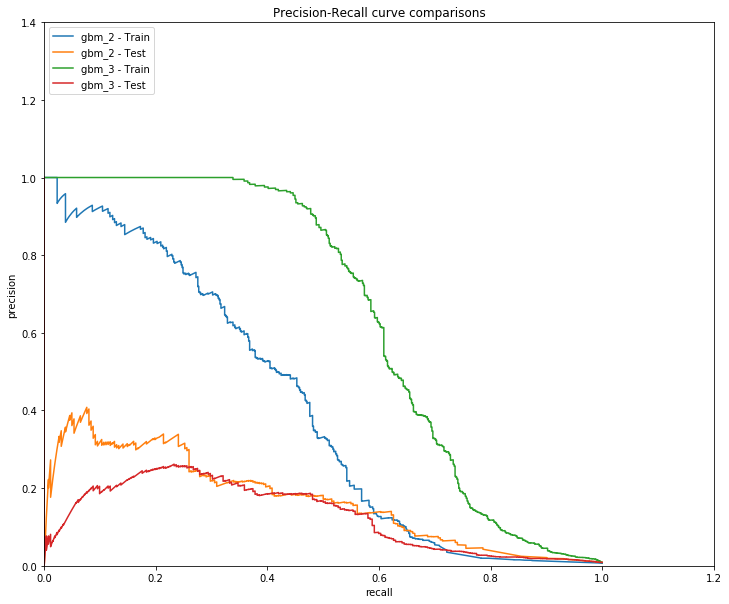

In [71]:
models = []
pickledmodelnames = ['gbm_2','gbm_3']

feature_sets = [features, features]
         
for p in pickledmodelnames:
    with open('./models/'+p+'.pkl','rb') as f:
         m = pickle.load(f)
    models.append(m)

Xs = [X_train, X_test]
ys = [y_train, y_test]

datanames = ['Train', 'Test','Train2', 'Test2']

modelReports(models, Xs, ys, feature_sets, pickledmodelnames, datanames)

### Business Impact

In [72]:
data2 = data.copy()
data2 = data2.assign(fail_prob = model.predict_proba(data2[features])[:,1].ravel())

In [74]:
#insample['train'] = numpy.random.rand(len(insample)) < .75

i = 0
for d in data2['device'].unique():
    i += 1
    if (i > 10) & (i < 50): print(data2.loc[(data['device'] == d)&(data['train']==False),['date','device','failure','fail_7d','fail_prob']])
        

Empty DataFrame
Columns: [date, device, failure, fail_7d, fail_prob]
Index: []
Empty DataFrame
Columns: [date, device, failure, fail_7d, fail_prob]
Index: []
           date    device  failure  fail_7d  fail_prob
12   2015-01-01  S1F02MGA        0        0       0.01
1175 2015-01-02  S1F02MGA        0        0       0.01
2338 2015-01-03  S1F02MGA        0        0       0.01
3501 2015-01-04  S1F02MGA        0        0       0.02
4663 2015-01-05  S1F02MGA        0        0       0.01
5824 2015-01-06  S1F02MGA        0        0       0.01
Empty DataFrame
Columns: [date, device, failure, fail_7d, fail_prob]
Index: []
Empty DataFrame
Columns: [date, device, failure, fail_7d, fail_prob]
Index: []
Empty DataFrame
Columns: [date, device, failure, fail_7d, fail_prob]
Index: []
Empty DataFrame
Columns: [date, device, failure, fail_7d, fail_prob]
Index: []
Empty DataFrame
Columns: [date, device, failure, fail_7d, fail_prob]
Index: []
           date    device  failure  fail_7d  fail_prob
18   20

Empty DataFrame
Columns: [date, device, failure, fail_7d, fail_prob]
Index: []
Empty DataFrame
Columns: [date, device, failure, fail_7d, fail_prob]
Index: []
Empty DataFrame
Columns: [date, device, failure, fail_7d, fail_prob]
Index: []
Empty DataFrame
Columns: [date, device, failure, fail_7d, fail_prob]
Index: []
Empty DataFrame
Columns: [date, device, failure, fail_7d, fail_prob]
Index: []
Empty DataFrame
Columns: [date, device, failure, fail_7d, fail_prob]
Index: []
Empty DataFrame
Columns: [date, device, failure, fail_7d, fail_prob]
Index: []
Empty DataFrame
Columns: [date, device, failure, fail_7d, fail_prob]
Index: []
           date    device  failure  fail_7d  fail_prob
42   2015-01-01  S1F08R94        0        0       0.00
1205 2015-01-02  S1F08R94        0        0       0.00
2368 2015-01-03  S1F08R94        0        0       0.00
3531 2015-01-04  S1F08R94        0        0       0.00
4692 2015-01-05  S1F08R94        0        0       0.00
Empty DataFrame
Columns: [date, device

In [115]:
cutoff = .05

maintenances = data2[data2['fail_prob'] > cutoff]
print(len(maintenances))
print(len(maintenances.loc[maintenances['fail_7d'] == 1,'device'].unique()))
print(len(maintenances.loc[maintenances['fail_7d'] == 1,'device'].unique()))

1697
88


In [129]:
#data3 = data2.copy().set_index(['device','date']).sort_index()
data3 = data2.copy()

In [130]:
data3 = data3.loc[data3['train'] == False,:]

In [131]:
len(data3)/7

4578.714285714285

In [144]:
cutoff = .01

hadfailure = (data3['fail_7d'] == 1)
metcutoff = (data2['fail_prob'] >= cutoff)
notmetcutoff = (data2['fail_prob'] < cutoff)

print(len(data3))
print(len(data3.loc[hadfailure,'device'].unique())) # num of devices that failed
print(len(data3.loc[metcutoff & hadfailure,'device'].unique())) # num of device failures that wouldve been prevented

32051
31
6575      8
7425      8
8181      8
8937      8
9692      8
10447     8
11202     8
11957     8
13996     8
14711     8
15426     8
16139     8
16802     8
16855     8
17514     8
17567     8
18226     8
18279     8
18938     8
18991     8
19651     8
20363     8
21075     8
21786     8
25420     8
26132     8
55950     8
56627     8
57300     8
59988     8
60624     8
63476     8
63961     8
64446     8
64931     8
65416     8
65901     8
66386     8
66871     8
75298     8
75445     8
75657     8
75804     8
76016     8
76163     8
76375     8
76522     8
76734     8
76881     8
77093     8
77240     8
77452     8
77599     8
77811     8
77958     8
78239     8
78335     8
78570     8
78644     8
78975     8
79048     8
79379     8
81007     8
81367     8
81727     8
82088     8
82449     8
84247     8
84603     8
84955     8
85307     8
85659     8
86010     8
86358     8
91398     8
98493     8
98591     8
98839     8
98937     8
99185     8
99283     8
99531     8
99629  

In [141]:
#are there trends in the data that would indicate the failures we are missing?
data3.loc[notmetcutoff & hadfailure,:].set_index(['device','date']).sort_index().describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,attribute1_change_1,attribute2_change_1,attribute3_change_1,attribute4_change_1,attribute5_change_1,attribute6_change_1,attribute7_change_1,attribute8_change_1,attribute9_change_1,attribute1_change_3,attribute2_change_3,attribute3_change_3,attribute4_change_3,attribute5_change_3,attribute6_change_3,attribute7_change_3,attribute8_change_3,attribute9_change_3,attribute1_change_9,attribute2_change_9,attribute3_change_9,attribute4_change_9,attribute5_change_9,attribute6_change_9,attribute7_change_9,attribute8_change_9,attribute9_change_9,fail_7d,fail_prob
count,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00
mean,0.09,119142901.46,286.95,2.05,107.21,12.31,260325.85,0.00,0.00,1.50,1.97,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,5.29,0.00,0.00,0.00,0.01,0.00,-0.03,-0.03,0.03,4.06,0.01,0.00,934.58,0.00,0.01,-0.04,-0.04,0.03,1.00,0.00
std,0.29,75354958.04,587.13,3.76,200.63,9.69,96567.53,0.00,0.00,2.20,9.36,0.00,0.00,0.00,0.12,0.01,0.00,0.00,0.07,35.31,0.01,0.00,0.05,0.12,0.01,0.17,0.17,0.18,31.05,0.05,0.00,9667.36,0.00,0.01,0.19,0.19,0.18,0.00,0.00
min,0.00,5673864.00,0.00,0.00,0.00,3.00,45.00,0.00,0.00,0.00,-0.97,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.96,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,0.00,-0.96,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,0.00,1.00,0.00
25%,0.00,49768048.00,0.00,0.00,0.00,6.00,229565.50,0.00,0.00,0.00,-0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
50%,0.00,113446864.00,0.00,0.00,0.00,9.00,275912.00,0.00,0.00,1.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,0.00,184241468.00,392.00,0.50,2.00,12.00,336265.00,0.00,0.00,2.00,0.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.80,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,1.00,0.01
max,1.00,243997048.00,2104.00,9.00,487.00,36.00,416005.00,0.00,0.00,9.00,85.09,0.02,0.00,0.00,1.20,0.06,0.00,0.00,0.50,359.25,0.08,0.00,0.50,1.20,0.07,0.00,0.00,1.25,319.68,0.47,0.00,100000.00,0.00,0.05,0.00,0.00,1.25,1.00,0.01
